#DMML2020 - Project
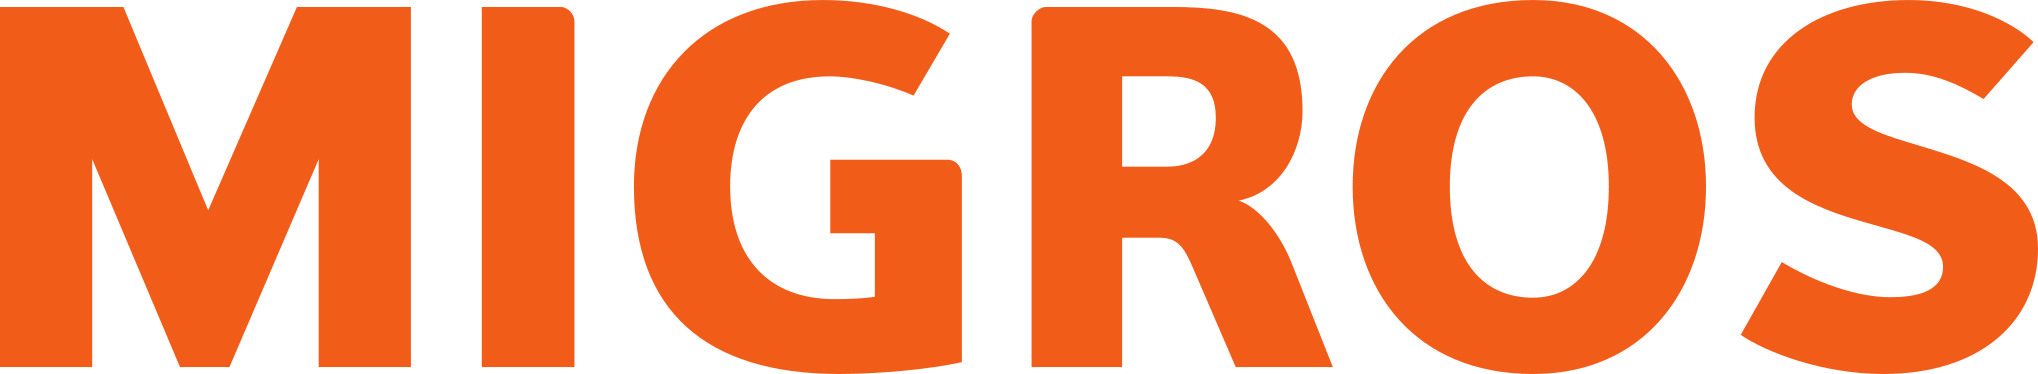
##Classification problem
In this project we analyze the data to know if a tweet is about a real disaster (target = 1) or not (target = 0).


In this first iteration we just fit the training data in the Logistic regression and observe the accuracy.


In [ ]:
# Install and update spaCy
!pip install -U spacy

# Download the english language model
!python -m spacy download en

     |████████████████████████████████| 10.0MB 4.0MB/s 
     |████████████████████████████████| 2.1MB 45.8MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 12.1MB 641kB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-cp36-none-any.whl size=12047109 sha256=bbf2af22a181446f6c258e39d081844305954c2a7db7b4b349c24ac52a0d23b6
  Stored in directory: /tmp/pip-ephem-wheel-cache-g8intyhk/wheels/2b/3f/41/f0b92863355c3ba34bb32b37d8a0c662959da0058202094f46
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/lo

In [1]:
# Import required packages
import spacy
from spacy import displacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

In [2]:
# Import additional packages
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
#Reading the dataframe to build our model
df_train = pd.read_csv("https://raw.githubusercontent.com/98bao/Migros/main/data/training_data.csv")
df_train.head(30)

,id,keyword,location,text,target
0,3738,destroyed,USA,Black Eye 9: A space battle occurred at Star O...,0
1,853,bioterror,NaN,#world FedEx no longer to transport bioterror ...,0
2,10540,windstorm,"Palm Beach County, FL",Reality Training: Train falls off elevated tra...,1
3,5988,hazardous,USA,#Taiwan Grace: expect that large rocks trees m...,1
4,6328,hostage,Australia,New ISIS Video: ISIS Threatens to Behead Croat...,1
5,6669,landslide,Scotland,FreeBesieged: .MartinMJ22 YouGov Which '#Tory ...,1
6,9772,trapped,New York City,Billionaires have a plan to free half a billio...,0
7,10361,weapons,Multinational *****,@JamesMelville Some old testimony of weapons u...,0
8,1953,burning%20buildings,Los Angeles,Ali you flew planes and ran into burning build...,0
9,9586,thunder,NaN,The thunder shook my house woke my sister and ...,1


In [4]:
#Reading dataframe which is going to be tested
df_test = pd.read_csv("https://raw.githubusercontent.com/98bao/Migros/main/data/test_data.csv")
df_test.head(5)

,id,keyword,location,text
0,9972,tsunami,NaN,Crptotech tsunami and banks.\n http://t.co/KHz...
1,9865,traumatised,"Portsmouth, UK",I'm that traumatised that I can't even spell p...
2,1937,burning%20buildings,NaN,@foxnewsvideo @AIIAmericanGirI @ANHQDC So ... ...
3,3560,desolate,NaN,Me watching Law &amp; Order (IB: @sauldale305)...
4,2731,crushed,bahstun/porta reeko,Papi absolutely crushed that ball


In [5]:
#Reading the sample submission
sample_submission = pd.read_csv("https://raw.githubusercontent.com/98bao/Migros/main/data/sample_submission.csv")

In [15]:
df_train['text'].head(30)

0     Black Eye 9: A space battle occurred at Star O...
1     #world FedEx no longer to transport bioterror ...
2     Reality Training: Train falls off elevated tra...
3     #Taiwan Grace: expect that large rocks trees m...
4     New ISIS Video: ISIS Threatens to Behead Croat...
5     FreeBesieged: .MartinMJ22 YouGov Which '#Tory ...
6     Billionaires have a plan to free half a billio...
7     @JamesMelville Some old testimony of weapons u...
8     Ali you flew planes and ran into burning build...
9     The thunder shook my house woke my sister and ...
10    Police Monitoring 200 Jihadis in Poland http:/...
11    My dad is panicking as my weight loss means he...
12    Alleged driver in #Kuwait attack 'joined Daesh...
13    Video:  Fire burns two apartment buildings and...
14    Thanks Benson &amp; Clegg for the #follow! Che...
15    Mexico: construction of bridge collapse killså...
16    God forbid anyone in my family knows how to an...
17    Micom 2015 Summer Contrast Candy Color Bow

In [16]:
noise = list(['RT', 'http', 'IB'])
print(noise)

['RT', 'http', 'IB']


In [10]:
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
#Create Tokenizer

# Define stopwords, punctuation, and numbers
stop_words = spacy.lang.en.stop_words.STOP_WORDS
punctuations = string.punctuation
numbers = "0123456789"


sp = spacy.load('en_core_web_sm')

#Tokenizer function
def spacy_tokenizer(sentence):
    mytokens = sp(sentence)

# Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]  
# Remove stop words and punctuation
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations]

# Remove Noise 
    mytokens = [word for word in mytokens if word not in noise]
 
 # Remove sufix like ".[1" in "experience.[1"
    mytokens_2 = []
    for word in mytokens:
      for char in word:
        if (char in punctuations) or (char in numbers):
          word = word.replace(char, "")
      if word != "":
        mytokens_2.append(word)


# Return preprocessed list of tokens
    return mytokens_2

#demo
review = df_train["text"].sample()
review.values[0]


'Some of worst radiation exposure from Fukushima meltdown happened 47km northwest-Proof that small emergency planning zones don\x89Ûªt cut it'

In [38]:
#TF-IDF feature vector
tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer)

In [39]:
#Setting up the train test split
features = ['keyword', 'location', 'text']

#First for the training data
X = df_train['text']
y = df_train['target']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [40]:
%%time
#Linear reg
LR = LogisticRegression(solver="lbfgs", max_iter=100)

#pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', LR)])

CPU times: user 201 µs, sys: 1 µs, total: 202 µs
Wall time: 208 µs


In [41]:
%%time
pipe.fit(X_train, y_train)

CPU times: user 54.4 s, sys: 129 ms, total: 54.5 s
Wall time: 54.5 s


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...,
                                 tokenizer=<function spacy_tokenizer at 0x7f04dc01e840>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_i

In [42]:
#Accuracy of the train data
y_pred_train = pipe.predict(X_train)
print(f"TRAIN ACCURACY SCORE:\n{accuracy_score(y_train, y_pred_train):.4f}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_pred_train)}")

TRAIN ACCURACY SCORE:
0.8941
CONFUSION MATRIX:
[[2883   78]
 [ 470 1745]]


In [43]:
%%time
#Accuracy of the test data
y_pred_test = pipe.predict(X_test)
print(f"TEST ACCURACY SCORE:\n{accuracy_score(y_test, y_pred_test):.4f}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_pred_test)}")

TEST ACCURACY SCORE:
0.7977
CONFUSION MATRIX:
[[664  76]
 [186 369]]
CPU times: user 13.7 s, sys: 5.98 ms, total: 13.7 s
Wall time: 13.7 s


0.7977


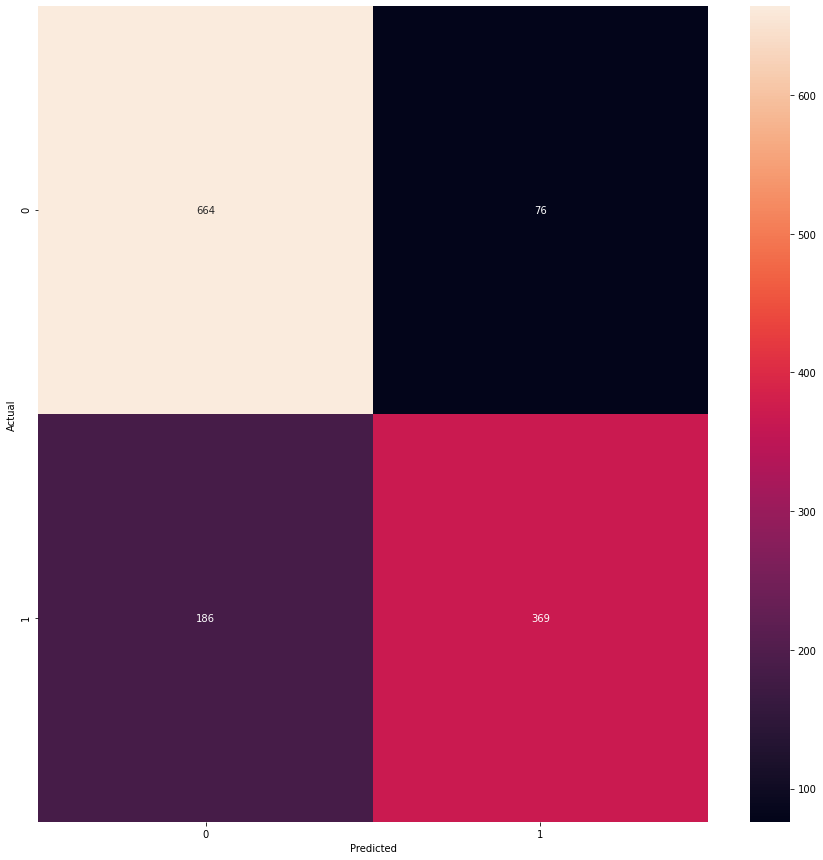

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
print(round(accuracy_score(y_test, y_pred_test), 4))
conf_mat = confusion_matrix(y_test, y_pred_test)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [65]:
import pandas as pd    
import numpy as np 
target_test = pipe.predict(df_test['text'])
target_test = pd.DataFrame(target_test)

In [66]:
sample_submission.assign(target= target_test)
target_test.to_csv('submission-3.csv',  index= False)


In [47]:
import gensim
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import bs4 as bs
import urllib.request
import spacy
import string
import math
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns


## Trying to improve the prediciton's accurancy

In order to improve our prediction we begin by:
- Improve text 
- Resampling 
- Use another classifier




1. Use another classifier

In [48]:
# Use random forest
from sklearn.ensemble import RandomForestClassifier


In [49]:
# Define vectorizer
tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer) 

In [50]:
# Define classifier
RF = RandomForestClassifier()


In [51]:
# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', RF)])


In [52]:
%%time
# Fit model on training set
pipe.fit(X_train, y_train)


CPU times: user 58.3 s, sys: 67.7 ms, total: 58.4 s
Wall time: 58.5 s


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [53]:
%%time
#Accuracy of the test data
y_pred_test = pipe.predict(X_test)
print(f"TEST ACCURACY SCORE:\n{accuracy_score(y_test, y_pred_test):.4f}")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_pred_test)}")

TEST ACCURACY SCORE:
0.7707
CONFUSION MATRIX:
[[652  88]
 [209 346]]
CPU times: user 13.6 s, sys: 3.99 ms, total: 13.6 s
Wall time: 13.6 s
